In [ ]:
#upload the data
import pandas as pd
tweets = pd.read_csv('tweets.csv')
grTweets = pd.read_csv('groupedTweets.csv')
tweets.columns
grTweets.columns

Index(['group', 'tweetID', 'username', 'text', 'qScore', 'nScore'], dtype='object')

In [ ]:
grTweets

,group,tweetID,username,text,qScore,nScore
0,0,1621600585291014145,realJackEason,@pansexualflower Criterion certainly have US r...,0.613271,2.934114
1,0,1621600597127331842,battez,@StratAnalytica @EconguyRosie yeah I'm in UK j...,0.603617,1.712620
2,0,1621600609030782981,Reno_station,@NappaBald66 Dry clean eraser should do the tr...,0.669598,3.165340
3,0,1621600638256693252,pedrinho_uk,@alanvibe @DrHoenderkamp @haringeycouncil @mik...,0.543737,3.485828
4,0,1621600792812609541,ClimateSchmidt,"@PGDynes Climate change is a real problem, but...",0.609599,1.870719
...,...,...,...,...,...,...
9963,466,1621606007179812864,Quattro091275,@whiskytip @TheWhiskyNovice @BimberLondon Very...,0.569231,0.000000
9964,467,1621606023466258433,iansltx,So this means that in 2026 there'll be Ford vs...,0.607426,0.000000
9965,468,1621606075605680130,TheMooreOfNewry,Should be no fucking split about it. Terminate...,0.607125,1.180456
9966,469,1621606081884463106,athpaps7,How is Graham Potter starting havertz over Aub...,0.607810,1.712620


In [ ]:
#import all necessary libraries
import re

import numpy as np

import pandas as pd

from pprint import pprint

import gensim

import gensim.corpora as corpora

from gensim.utils import simple_preprocess

from nltk.corpus import stopwords

from gensim.models import CoherenceModel

import spacy

import matplotlib.pyplot as plt

import nltk

import spacy

nltk.download('stopwords')

nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Details of the tweets Dataset
num_rows = len(tweets)
num_rows -= 1
average_length = tweets['text'].str.len().mean()

min_len = tweets["text"].apply(len).min()
max_len = tweets["text"].apply(len).max()

print(f"Number of items: {num_rows:.2f}")
print(f"Average length of text: {average_length:.2f}")
print(f"Minimum length: {min_len}")
print(f"Maximum length: {max_len}")

Number of items: 10000.00
Average length of text: 151.90
Minimum length: 18
Maximum length: 926


In [ ]:
tweets.describe()


,_id,qScore,nScore
count,1.000100e+04,10001.000000,10001.000000
mean,1.621603e+18,0.596829,0.605678
std,1.583624e+12,0.055174,1.733462
min,1.621601e+18,0.374306,-7.033362
25%,1.621602e+18,0.571552,0.000000
50%,1.621603e+18,0.607887,0.079807
75%,1.621605e+18,0.609435,1.870719
max,1.621606e+18,0.820619,5.259908


In [ ]:
from gensim.utils import tokenize

In [ ]:
#tokenisation function
def tokenize_text(text):
    return list(tokenize(text, lower=True))


In [ ]:
# apply the tokenize_text function to the tweets dataset to form the "tokens" column
tweets["tokens"] = tweets["text"].apply(tokenize_text)

In [ ]:
#printing the top 100 tokens

from collections import Counter
all_tokens = [token for tweet in tweets['tokens'] for token in tweet]
token_counts = Counter(all_tokens)
top_100_tokens = token_counts.most_common(100)
for token, count in top_100_tokens:
    print(f"{token}: {count}")


the: 8530
t: 6205
to: 5143
co: 4871
https: 4812
a: 4331
and: 3882
in: 3858
of: 3678
i: 2959
s: 2452
is: 2407
for: 2323
you: 2262
it: 2168
on: 1856
that: 1665
this: 1479
uk: 1404
are: 1375
with: 1256
be: 1150
new: 1124
they: 1057
at: 1015
have: 1005
not: 1004
from: 948
as: 921
but: 887
we: 867
was: 835
york: 792
london: 777
my: 768
he: 767
all: 757
so: 732
by: 725
can: 676
your: 659
if: 656
will: 648
m: 629
what: 625
just: 624
amp: 609
no: 579
out: 566
up: 549
has: 544
like: 540
about: 537
conservatives: 525
or: 507
people: 490
more: 488
who: 487
do: 485
labour: 483
an: 478
now: 475
our: 462
get: 460
one: 455
me: 455
when: 450
their: 441
there: 430
england: 423
us: 408
his: 392
how: 387
time: 387
re: 384
don: 383
would: 370
them: 362
why: 361
see: 355
been: 337
here: 319
good: 306
back: 305
only: 291
know: 289
over: 283
had: 282
u: 281
boris: 274
were: 271
think: 271
should: 270
some: 265
ve: 264
after: 256
city: 255
go: 254
vs: 252
she: 247


In [ ]:
#stemming function

import pandas as pd
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

def stem_text(tokens):
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(stemmer.stem(token))
    return stemmed_tokens


In [ ]:
# apply the stem_text function to the "tokens" column
tweets['tokens'] = tweets['tokens'].apply(stem_text)


In [ ]:
#removing stopwords
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  tok = []
  for token in tokens:
    if token not in stop_words:
      tok.append(token)
  return tok

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stopwords from the tokens column
tweets['tokens'] = tweets['tokens'].apply(remove_stopwords)


In [ ]:
#create the bigram model
bigram = gensim.models.Phrases(tweets["tokens"], min_count=5, threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)


In [ ]:
def create_bigrams(texts):

    return [bigram_mod[doc] for doc in texts]


In [ ]:
#create data bigrams from the tokens column
data_bigrams = create_bigrams(tweets["tokens"])


In [ ]:
#lemmatizing function
def lemmatize(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):

    texts_op = []

    for sent in texts:

        doc = nlp(" ".join(sent))

        texts_op.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    return texts_op

In [ ]:
#apply stemming
data_lemmatized = lemmatize(data_bigrams, allowed_postags=[ 'NOUN', 'ADJ', 'VERB'])


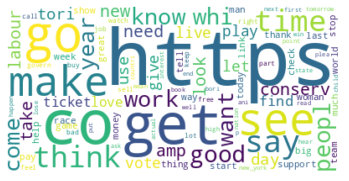

In [ ]:

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokens = [token for sublist in data_lemmatized for token in sublist]

top_tokens = dict(Counter(tokens).most_common(100))

wordcloud = WordCloud(background_color="white").generate_from_frequencies(top_tokens)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

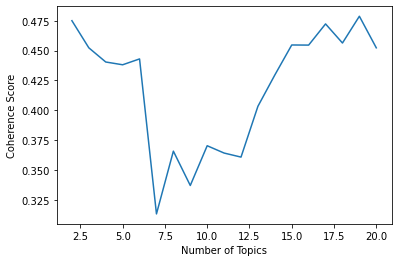

In [ ]:
#to find out the most appropriate value of K, calculate coherence scores for different topics

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

dictionary = Dictionary(data_lemmatized)
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]

min_topics = 2
max_topics = 20
step_size = 1
coherence_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=data_lemmatized,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(coherence_model_lda.get_coherence())

plt.plot(range(min_topics, max_topics+1, step_size), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

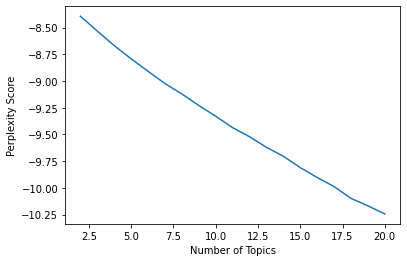

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#to find out the most appropriate value of K, calculate perplexity scores for different topics

min_topics = 2
max_topics = 20
step_size = 1
perplexity_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=data_lemmatized,
        dictionary=dictionary,
        coherence='c_v'
    )
    perplexity_scores.append(lda_model.log_perplexity(corpus))

plt.plot(range(min_topics, max_topics+1, step_size), perplexity_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.show()

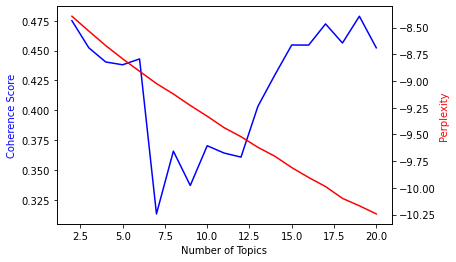

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



# Calculate coherence scores and perplexity for different numbers of topics
min_topics = 2
max_topics = 20
step_size = 1
coherence_scores = []
perplexity_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=data_lemmatized,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(coherence_model_lda.get_coherence())
    perplexity_scores.append(lda_model.log_perplexity(corpus))

# Plot coherence scores and perplexity against number of topics
fig, ax1 = plt.subplots()
ax1.plot(range(min_topics, max_topics+1, step_size), coherence_scores, 'b-')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color='b')

ax2 = ax1.twinx()
ax2.plot(range(min_topics, max_topics+1, step_size), perplexity_scores, 'r-')
ax2.set_ylabel('Perplexity', color='r')

#fig.tight_layout()
plt.show()

In [ ]:
#applying LDA
gensim_dictionary = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]
[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:4]] 

lda_model = gensim.models.ldamodel.LdaModel(

   corpus=gensim_corpus, id2word=gensim_dictionary, num_topics=19, random_state=100, 

   update_every=1, chunksize=100, passes=50, alpha='auto', per_word_topics=True

)

coherence_model_lda = CoherenceModel(

   model=lda_model, texts=data_lemmatized, dictionary=gensim_dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.4788305813692285


In [ ]:
import numpy as np
from scipy.stats import entropy

# assume `lda_model` is your trained LDA model
topic_term_dists = lda_model.get_topics()
num_topics = lda_model.num_topics

# compute KL divergence between all pairs of topics
kl_divs = np.zeros((num_topics, num_topics))
for i in range(num_topics):
    for j in range(i+1, num_topics):
        kl_divs[i,j] = entropy(topic_term_dists[i], topic_term_dists[j])
        kl_divs[j,i] = entropy(topic_term_dists[j], topic_term_dists[i])

# print the KL divergence matrix
print(kl_divs)

[[0.         5.35367298 4.62722826 4.88532543 4.48070288 4.85127592
  4.67759228 4.65398741 4.78509951 4.87220764 4.93293047 4.71470499
  4.79128456 4.92671776 4.64627028 4.7905345  5.23301268 4.97461987
  4.68274879]
 [6.18973827 0.         6.04285431 6.30781651 5.8904314  6.27272987
  6.09433031 6.0699749  6.20482349 6.29495239 6.35890484 6.13487768
  6.21067524 6.3513937  6.06118393 6.21107006 6.66190243 6.40124607
  6.10245371]
 [4.58526421 5.16114187 0.         4.69570446 4.29468918 4.66040564
  4.48937321 4.46737289 4.59297419 4.68198013 4.74166584 4.52728271
  4.60133886 4.73458385 4.45913029 4.60162115 5.04029751 4.78535891
  4.49507284]
 [5.09145498 5.67142677 4.94250679 0.         4.79547787 5.16782141
  4.99500036 4.97096491 5.10154629 5.18943977 5.25337315 5.03350735
  5.10958767 5.24362421 4.9639802  5.10779476 5.55035496 5.29285192
  4.99911022]
 [4.06551838 4.63948679 3.9168489  4.16957855 0.         4.13727427
  3.96737695 3.94404507 4.07123089 4.15584087 4.21991587 4.0

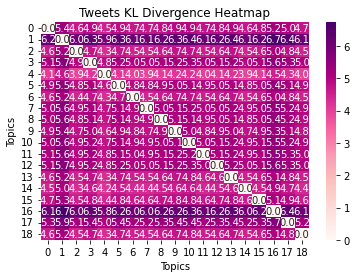

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(kl_divs, cmap="RdPu", annot=True, fmt=".1f")
plt.title("Tweets KL Divergence Heatmap")
plt.xlabel("Topics")
plt.ylabel("Topics")
plt.show()

In [ ]:
topics = lda_model.show_topics(num_topics=19, num_words=20)
for topic in topics:
    print(topic)

(0, '0.042*"ticket" + 0.039*"way" + 0.038*"week" + 0.028*"buy" + 0.025*"next" + 0.024*"doe" + 0.022*"high" + 0.022*"care" + 0.021*"turn" + 0.021*"ukrain" + 0.019*"stand" + 0.015*"nice" + 0.015*"protect" + 0.015*"leav" + 0.012*"half" + 0.012*"class" + 0.012*"learn" + 0.011*"mate" + 0.010*"lack" + 0.009*"connect"')
(1, '0.114*"rudnx" + 0.114*"mdbn" + 0.114*"spender" + 0.091*"get" + 0.032*"vote" + 0.028*"pay" + 0.016*"new_york" + 0.015*"big" + 0.012*"do" + 0.010*"follow" + 0.009*"rise" + 0.008*"major" + 0.007*"death" + 0.007*"hate" + 0.007*"goal" + 0.007*"hour" + 0.006*"close" + 0.006*"drop" + 0.006*"polic" + 0.005*"case"')
(2, '0.099*"time" + 0.055*"support" + 0.030*"sell" + 0.018*"report" + 0.017*"local" + 0.016*"total" + 0.016*"system" + 0.013*"walk" + 0.013*"wear" + 0.012*"goe" + 0.011*"blue" + 0.011*"independ" + 0.011*"grow" + 0.009*"leader" + 0.009*"murder" + 0.009*"victim" + 0.008*"mp" + 0.008*"easi" + 0.008*"fan" + 0.007*"fail"')
(3, '0.074*"labour" + 0.066*"amp" + 0.035*"show" + 

In [ ]:
for i in range(19):
    print(f"Topic {i} - Coherence Score: {coherence_scores[i]}, Perplexity Score: {perplexity_scores[i]}")

NameError: ignored

In [ ]:

q_scores = tweets['qScore']
n_scores = tweets['nScore']

topic_assignments = [lda_model.get_document_topics(corpus[i], minimum_probability=0.0) for i in range(len(corpus))]
topic_q_scores = []
topic_n_scores = []
for i in range(lda_model.num_topics):
    q_score = 0
    n_score = 0
    num_tweets = 0
    for j in range(len(tweets)):
        if topic_assignments[j]:
            topic_prob = topic_assignments[j][i][1]
            q_score += q_scores[j] * topic_prob
            n_score += n_scores[j] * topic_prob
            num_tweets += 1
    if num_tweets > 0:
        topic_q_scores.append(q_score / num_tweets)
        topic_n_scores.append(n_score / num_tweets)
    else:
        topic_q_scores.append(0)
        topic_n_scores.append(0)

In [ ]:
topic_q_scores

[0.02872291947548974,
 0.02935080146818037,
 0.02774956632106163,
 0.02497557202397956,
 0.04270622328545586,
 0.030001434718370048,
 0.03148056727420302,
 0.023985138979725953,
 0.03601276944400445,
 0.023841595294847764,
 0.025498096702404802,
 0.027519037256904483,
 0.038549489094822253,
 0.01921914300387359,
 0.02737694604027533,
 0.030318845571268602,
 0.02953014914167493,
 0.027104960695658913,
 0.047110967112479044,
 0.025774993940467686]

In [ ]:
topic_n_scores 

[0.029781748369823828,
 0.030284042136351753,
 0.029676188295900126,
 0.024732819478062253,
 0.043426853558783785,
 0.026144642731434867,
 0.0315764127550737,
 0.02428772490422009,
 0.03618806871371289,
 0.023760208659553937,
 0.02580500700649796,
 0.027799997751448577,
 0.03901108616563947,
 0.02065041275071382,
 0.027452117166276217,
 0.031302392307672566,
 0.03066511813329758,
 0.027910801422263914,
 0.048347345297465344,
 0.02687507852066502]

In [ ]:
import pandas as pd
grouped_tweets = grTweets.groupby('group')['text'].apply(' '.join).reset_index()

In [ ]:
#tokenise, stem, remove stopwords, create bigrams and lemmatize grouped tweets
grouped_tweets["tokens"] = grouped_tweets["text"].apply(tokenize_text)
grouped_tweets['tokens'] = grouped_tweets['tokens'].apply(stem_text)
grouped_tweets['tokens'] = grouped_tweets['tokens'].apply(remove_stopwords)
grdata_bigrams = create_bigrams(grouped_tweets["tokens"])
grdata_lemmatized = lemmatize(grdata_bigrams, allowed_postags=[ 'NOUN', 'ADJ', 'VERB'])


In [ ]:
#Details of the tweets Dataset
num_rows = len(grouped_tweets)
num_rows -= 1
average_length = grouped_tweets['text'].str.len().mean()

min_len = grouped_tweets["text"].apply(len).min()
max_len = grouped_tweets["text"].apply(len).max()

print(f"Number of items: {num_rows:.2f}")
print(f"Average length of text: {average_length:.2f}")
print(f"Minimum length: {min_len}")
print(f"Maximum length: {max_len}")

Number of items: 470.00
Average length of text: 3235.56
Minimum length: 31
Maximum length: 152602


In [ ]:
grouped_tweets.describe()

,group
count,471.000000
mean,235.000000
std,136.110249
min,0.000000
25%,117.500000
50%,235.000000
75%,352.500000
max,470.000000


In [ ]:
from collections import Counter
gr_all_tokens = [token for tweet in grouped_tweets['tokens'] for token in tweet]
gr_token_counts = Counter(gr_all_tokens)
gr_top_100_tokens = gr_token_counts.most_common(100)
for token, count in gr_top_100_tokens:
    print(f"{token}: {count}")

co: 4858
https: 4799
uk: 1399
new: 1121
york: 788
london: 773
get: 647
amp: 608
like: 582
conserv: 570
time: 509
peopl: 504
go: 489
labour: 488
one: 481
england: 420
year: 416
us: 406
see: 383
would: 367
work: 365
whi: 359
need: 349
live: 348
day: 340
look: 339
back: 333
make: 332
know: 332
think: 329
want: 324
tori: 316
good: 313
say: 306
come: 296
onli: 290
love: 288
u: 281
right: 277
bori: 274
even: 272
citi: 272
use: 268
vs: 252
well: 248
vote: 247
race: 247
scotland: 246
via: 240
still: 239
support: 237
parti: 237
link: 228
becaus: 226
play: 225
manchest: 221
ani: 219
p: 217
show: 213
take: 212
let: 204
never: 204
world: 204
got: 203
great: 198
realli: 193
veri: 192
unit: 192
x: 191
thank: 191
could: 190
much: 189
ticket: 189
pm: 188
thing: 188
best: 188
way: 188
start: 188
feb: 187
last: 187
man: 186
first: 183
eu: 182
game: 182
school: 178
stop: 178
free: 178
govern: 177
pleas: 175
money: 175
tri: 174
also: 172
call: 172
watch: 172
high: 170
th: 169
book: 168
countri: 166
wale: 

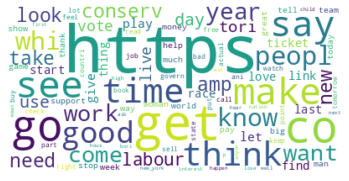

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokens = [token for sublist in grdata_lemmatized for token in sublist]

top_tokens = dict(Counter(tokens).most_common(100))

wordcloud = WordCloud(background_color="white").generate_from_frequencies(top_tokens)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

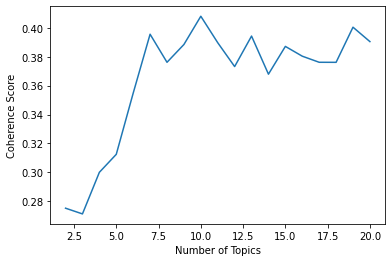

In [ ]:
# Calculate coherence scores for different numbers of topics
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

grdictionary = Dictionary(grdata_lemmatized)
grcorpus = [grdictionary.doc2bow(text) for text in grdata_lemmatized]

min_topics = 2
max_topics = 20
step_size = 1
grcoherence_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    gr_lda_model = LdaModel(
        corpus=grcorpus,
        id2word=grdictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    gr_coherence_model_lda = CoherenceModel(
        model=gr_lda_model,
        texts=grdata_lemmatized,
        dictionary=grdictionary,
        coherence='c_v'
    )
    grcoherence_scores.append(gr_coherence_model_lda.get_coherence())

# Plot coherence scores against number of topics
plt.plot(range(min_topics, max_topics+1, step_size), grcoherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

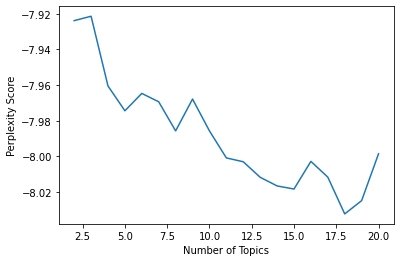

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

min_topics = 2
max_topics = 20
step_size = 1
perplexity_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    gr_lda_model = LdaModel(
        corpus=grcorpus,
        id2word=grdictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    gr_coherence_model_lda = CoherenceModel(
        model=gr_lda_model,
        texts=grdata_lemmatized,
        dictionary=grdictionary,
        coherence='c_v'
    )
    perplexity_scores.append(gr_lda_model.log_perplexity(grcorpus))

plt.plot(range(min_topics, max_topics+1, step_size), perplexity_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.show()

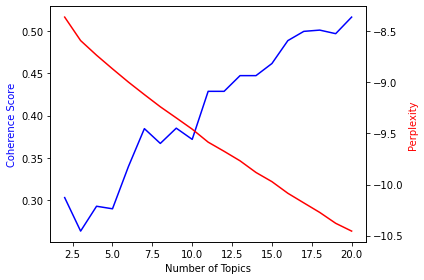

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

grdictionary = Dictionary(grdata_lemmatized)
grcorpus = [grdictionary.doc2bow(text) for text in grdata_lemmatized]

# Calculate coherence scores and perplexity for different numbers of topics
min_topics = 2
max_topics = 20
step_size = 1
grcoherence_scores = []
perplexity_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    gr_lda_model = LdaModel(
        corpus=grcorpus,
        id2word=grdictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    grcoherence_model_lda = CoherenceModel(
        model=gr_lda_model,
        texts=grdata_lemmatized,
        dictionary=grdictionary,
        coherence='c_v'
    )
    grcoherence_scores.append(grcoherence_model_lda.get_coherence())
    perplexity_scores.append(gr_lda_model.log_perplexity(grcorpus))

# Plot coherence scores and perplexity against number of topics
fig, ax1 = plt.subplots()
ax1.plot(range(min_topics, max_topics+1, step_size), grcoherence_scores, 'b-')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color='b')

ax2 = ax1.twinx()
ax2.plot(range(min_topics, max_topics+1, step_size), perplexity_scores, 'r-')
ax2.set_ylabel('Perplexity', color='r')

fig.tight_layout()
plt.show()

In [ ]:
#Using LDA after choosing K
grgensim_dictionary = corpora.Dictionary(grdata_lemmatized)


grtexts = grdata_lemmatized




grgensim_corpus = [grgensim_dictionary.doc2bow(text) for text in grtexts]




#creating the LDA model 

gr_lda_model = gensim.models.ldamodel.LdaModel(

   corpus=grgensim_corpus, id2word=grgensim_dictionary, num_topics=10, random_state=100, 

   update_every=1, chunksize=100, passes=50, alpha='auto', per_word_topics=True,

)


#calculating and displaying the coherence score

gr_coherence_model_lda = CoherenceModel(

   model=gr_lda_model, texts=grdata_lemmatized, dictionary=grgensim_dictionary, coherence='c_v')

gr_coherence_lda = gr_coherence_model_lda.get_coherence()

print('\nCoherence Score: ', gr_coherence_lda)


Coherence Score:  0.4079773148325529


In [ ]:
topics = gr_lda_model.show_topics(num_topics=10, num_words=20)
for topic in topics:
    print(topic)

(0, '0.038*"https" + 0.017*"co" + 0.012*"get" + 0.010*"go" + 0.007*"make" + 0.007*"new" + 0.006*"amp" + 0.006*"see" + 0.005*"look" + 0.005*"come" + 0.005*"say" + 0.005*"live" + 0.005*"think" + 0.005*"take" + 0.005*"find" + 0.005*"day" + 0.005*"work" + 0.005*"year" + 0.004*"race" + 0.004*"great"')
(1, '0.020*"play" + 0.007*"know" + 0.007*"nation" + 0.006*"year" + 0.005*"fish" + 0.005*"amaz" + 0.005*"radio" + 0.005*"scotland" + 0.004*"top" + 0.004*"ebay_uk" + 0.004*"month" + 0.004*"rich" + 0.003*"music" + 0.003*"listen" + 0.003*"harm" + 0.003*"mix" + 0.003*"son" + 0.003*"clown" + 0.003*"surgeon" + 0.002*"op"')
(2, '0.017*"day" + 0.016*"https" + 0.010*"next" + 0.007*"reuter" + 0.006*"list" + 0.006*"petit" + 0.006*"greencard_infosi" + 0.006*"vote" + 0.006*"enoughisenough_nondom" + 0.005*"question_sunak" + 0.004*"enough" + 0.004*"line" + 0.004*"predict" + 0.003*"gas" + 0.003*"share" + 0.003*"nhs" + 0.003*"allow_water" + 0.003*"sea_complet" + 0.003*"dump_raw" + 0.003*"key"')
(3, '0.012*"skyn

In [ ]:
for i in range(10):
    print(f"Topic {i} - Coherence Score: {grcoherence_scores[i]}, Perplexity Score: {perplexity_scores[i]}")

Topic 0 - Coherence Score: 0.27519326396111343, Perplexity Score: -7.923803147823454
Topic 1 - Coherence Score: 0.271234760131795, Perplexity Score: -7.921334732303734
Topic 2 - Coherence Score: 0.30001090982401885, Perplexity Score: -7.960501350945208
Topic 3 - Coherence Score: 0.3124553582236464, Perplexity Score: -7.974438123571335
Topic 4 - Coherence Score: 0.3547513833088041, Perplexity Score: -7.9646781727858125
Topic 5 - Coherence Score: 0.39554050833508064, Perplexity Score: -7.969389153818729
Topic 6 - Coherence Score: 0.3761237913620624, Perplexity Score: -7.985731392264915
Topic 7 - Coherence Score: 0.3884231650495566, Perplexity Score: -7.967850191093078
Topic 8 - Coherence Score: 0.4079773148325529, Perplexity Score: -7.985717866118392
Topic 9 - Coherence Score: 0.3896757247503074, Perplexity Score: -8.000908185862013


In [ ]:
q_scores = tweets['qScore']
n_scores = tweets['nScore']

topic_assignments = [gr_lda_model.get_document_topics(grgensim_corpus[i], minimum_probability=0.0) for i in range(len(grgensim_corpus))]
topic_q_scores = []
topic_n_scores = []
for i in range(gr_lda_model.num_topics):
    q_score = 0
    n_score = 0
    num_tweets = 0
    for j in range(len(grTweets)):
        if topic_assignments[j]:
            topic_prob = topic_assignments[j][i][1]
            q_score += q_scores[j] * topic_prob
            n_score += n_scores[j] * topic_prob
            num_tweets += 1
    if num_tweets > 0:
        topic_q_scores.append(q_score / num_tweets)
        topic_n_scores.append(n_score / num_tweets)
    else:
        topic_q_scores.append(0)
        topic_n_scores.append(0)

In [ ]:
topic_q_scores

[0.06978003355472664,
 0.02256280062050355,
 0.029337257986644057,
 0.02976383498089687,
 0.023573172073942154,
 0.021948666631298536,
 0.02232711432842843,
 0.03244072496119843,
 0.028132352360844364,
 0.02743672392014008,
 0.026366194652268568,
 0.015055716183537503,
 0.03736414299429179,
 0.02886517474803947,
 0.023827309351308446,
 0.024947430519192,
 0.02843365674090555,
 0.04707783285213535,
 0.02533289565122622,
 0.03229715456871294]

In [ ]:
topic_n_scores

[0.07148354849887596,
 0.02293149678172299,
 0.030116657234464054,
 0.02988497527836828,
 0.02397873242971667,
 0.02197611711096495,
 0.022896185220225945,
 0.03297337684764274,
 0.028699694821812317,
 0.02774499423106432,
 0.02717050191084126,
 0.015383764530229152,
 0.03840609448282054,
 0.029514965492615803,
 0.02424544130205217,
 0.025538288516722397,
 0.028794561165127446,
 0.04796790073418214,
 0.025539915709039247,
 0.032841935605796624]

In [ ]:
import numpy as np
from scipy.stats import entropy

topic_term_dists = gr_lda_model.get_topics()
num_topics = gr_lda_model.num_topics

kl_divs = np.zeros((num_topics, num_topics))
for i in range(num_topics):
    for j in range(i+1, num_topics):
        kl_divs[i,j] = entropy(topic_term_dists[i], topic_term_dists[j])
        kl_divs[j,i] = entropy(topic_term_dists[j], topic_term_dists[i])

print(kl_divs)

[[0.         2.92079592 2.58191586 2.29617643 2.426157   2.39844823
  2.25692129 2.43987966 2.52398419 2.80798149]
 [3.29756689 0.         1.9538703  1.43022418 2.92584276 1.53984427
  1.59932542 1.79946387 2.02846527 1.89909649]
 [3.12996387 2.04181576 0.         1.38463151 3.01894522 1.4740814
  1.46578836 1.64307761 1.90762138 1.86863828]
 [2.56520224 1.18852115 1.06399834 0.         2.22485161 0.63040096
  0.68818688 0.85892677 1.13627291 0.99122524]
 [1.92428863 2.97657919 2.87349606 2.4464283  0.         2.54153728
  2.57441139 2.80934596 2.87955832 2.91559052]
 [2.71258092 1.34141636 1.20258641 0.67379069 2.40461826 0.
  0.75542068 0.99654299 1.2653774  1.12717652]
 [2.66499639 1.74292648 1.56710172 1.05254889 2.72227621 1.03829813
  0.         1.36366534 1.65822482 1.52363479]
 [3.24018002 1.85743654 1.5787549  1.15264821 3.01169443 1.24946141
  1.21679604 0.         1.64992428 1.64314842]
 [2.92568159 2.39935374 2.24744678 1.72997117 2.78963661 1.80039787
  1.86093736 2.043128

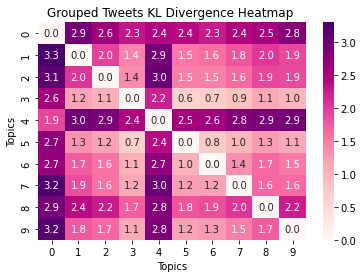

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(kl_divs, cmap="RdPu", annot=True, fmt=".1f")
plt.title("Grouped Tweets KL Divergence Heatmap ")
plt.xlabel("Topics")
plt.ylabel("Topics")
plt.show()

In [ ]:
doc_topic_dists = [gr_lda_model.get_document_topics(doc) for doc in corpus]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

avg_topic_dist = [0.0] * num_topics
for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc)
    for topic in topic_dist:
        avg_topic_dist[topic[0]] += topic[1]
avg_topic_dist = [x / len(corpus) for x in avg_topic_dist]

# Calculate similarity between each document and the average topic distribution
similarity_scores = []
for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc)
    doc_topic_dist = [0.0] * num_topics
    for topic in topic_dist:
        doc_topic_dist[topic[0]] = topic[1]
    similarity_score = cosine_similarity([doc_topic_dist], [avg_topic_dist])[0][0]
    similarity_scores.append(similarity_score)

# Identify documents with good and bad topic distribution
good_docs = []
bad_docs = []
similarity_threshold = 0.5  # you can adjust this value based on your corpus
for i, score in enumerate(similarity_scores):
    if score > similarity_threshold:
        good_docs.append(i)
    else:
        bad_docs.append(i)

print("Number of documents with good topic distribution:", len(good_docs))
print("Number of documents with bad topic distribution:", len(bad_docs))

Number of documents with good topic distribution: 4399
Number of documents with bad topic distribution: 275


In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get the topic distribution for each document
topic_dists = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Get the average topic distribution for all documents
avg_topic_dist = np.mean(topic_dists, axis=0)

# Set a threshold for good and bad topic distribution
threshold = np.mean(avg_topic_dist)

# Get the indices of documents with good topic distribution and bad topic distribution
good_docs_indices = np.where(avg_topic_dist >= threshold)[0]
bad_docs_indices = np.where(avg_topic_dist < threshold)[0]

# Get the actual documents
good_docs = [data_lemmatized[i] for i in good_docs_indices]
bad_docs = [data_lemmatized[i] for i in bad_docs_indices]

# Print the indices and documents of good and bad topic distribution
print("Indices of documents with good topic distribution:", good_docs_indices)
print("Documents with good topic distribution:")
for i, doc in zip(good_docs_indices, good_docs):
    print(i, doc)

print("\nIndices of documents with bad topic distribution:", bad_docs_indices)
print("Documents with bad topic distribution:")
for i, doc in zip(bad_docs_indices, bad_docs):
    print(i, doc)

Indices of documents with good topic distribution: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Documents with good topic distribution:
5 ['hors_race', 'histori', 'today', 'race', 'histori', 'exten', 'hor', 'bet', 'present', 'thoroughbr', 'race', 'action', 'australian', 'oversea', 'race']
6 ['store', 'rememb', 'whi', 'order', 'treat', 'staff', 'wait']
7 ['stream', 'watch', 'go', 'match', 'part', 'https', 'anhvvvnvvb']
8 ['check', 'snake', 'qfj', 'ebay_uk']
9 ['fabl', 'metaphy', 'gradual', 'becom', 'ripe', 'takeov', 'icarian', 'yearn', 'reassert', 'ration', 'conscienc', 'stifl', 'convent']
10 ['co', 'unpk']
11 ['trackrum', 'oldladycomp', 'cococlark']
12 ['johnredwood', 'check', 'loss', 'power', 'whi', 'law', 'rest', 'law', 'starter']
13 ['love', 'thank', 'cardiff']
14 ['bring', 'unforgett', 'memori', 'absolut', 'perfect', 'rhapsodi', 'epic', 'flight', 'take', 'love', 'look', 'heart', 'delight', 'go', 'day']
15 ['great', 'way', 'start', 'day', 'beeznat', 'season', 'kick', 'tomorrow', '

In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get the topic distribution for each document
topic_dists = [gr_lda_model.get_document_topics(doc, minimum_probability=0) for doc in grcorpus]

# Get the average topic distribution for all documents
avg_topic_dist = np.mean(topic_dists, axis=0)

# Set a threshold for good and bad topic distribution
threshold = np.mean(avg_topic_dist)

# Get the indices of documents with good topic distribution and bad topic distribution
good_docs_indices = np.where(avg_topic_dist >= threshold)[0]
bad_docs_indices = np.where(avg_topic_dist < threshold)[0]

# Get the actual documents
good_docs = [grdata_lemmatized[i] for i in good_docs_indices]
bad_docs = [grdata_lemmatized[i] for i in bad_docs_indices]

# Print the indices and documents of good and bad topic distribution
print("Indices of documents with good topic distribution:", good_docs_indices)
print("Documents with good topic distribution:")
for i, doc in zip(good_docs_indices, good_docs):
    print(i, doc)

print("\nIndices of documents with bad topic distribution:", bad_docs_indices)
print("Documents with bad topic distribution:")
for i, doc in zip(bad_docs_indices, bad_docs):
    print(i, doc)

Indices of documents with good topic distribution: [3 4 5 6 7 8 9]
Documents with good topic distribution:
3 ['week', 'end', 'abov', 'year', 'happen', 'stream', 'watch', 'go', 'match', 'part', 'https', 'bring', 'unforgett', 'memori', 'absolut', 'perfect', 'rhapsodi', 'epic', 'flight', 'take', 'love', 'look', 'heart', 'delight', 'go', 'day', 'watch', 'polish', 'allow', 'evil', 'rapist', 'woman', 'child', 'whi', 'stream', 'watch', 'https', 'go', 'match', 'part', 'wind', 'rainfal', 'low', 'deck', 'symposium', 'janeway', 'open', 'access', 'match', 'sandwich', 'unit', 'host', 'pm', 'screen', 'live', 'due', 'ban', 'action', 'pm', 'pm', 'result', 'co', 'ask', 'usual', 'question', 'peopl', 'vote', 'stay', 'read', 'omnisi', 'go', 'bring', 'bolling', 'https', 'bbcsport', 'difficult', 'subject', 'enough', 'black', 'player', 'get', 'badg', 'desir', 'elit', 'level', 'enough', 'black', 'peopl', 'go', 'asian', 'term', 'black', 'list', 'repre', 'element', 'prejudic', 'see', 'old', 'man', 'today', 'say